In [50]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [51]:
import seaborn as sns


## 다변수 표현

In [52]:
import pandas as pd 
data_df = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
data_df.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


In [53]:
# data_df.describe(include='all')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

### X:범주 / Y:연속
- 막대 그래프(barplot)
- 상자 그래프(box)

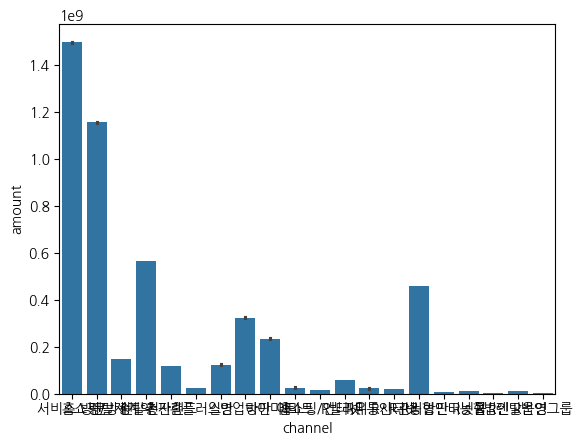

In [54]:
# sns.barplot(data=data_df, x='channel', y='amount') # count 범례가 몇번 나왔나
sns.barplot(data=data_df, x='channel', y='amount', estimator='sum') # sum
plt.show()

#### boxplot
- 각 feature들은 단위가 유사한 것 끼리 표현해야함.


In [55]:
channel_amount_sum_df = pd.pivot_table(data=data_df, index='channel', values=['amount'], aggfunc='sum')
channel_amount_sum_df

,amount
channel,
R관리방판,458556039
R농협,11337960
R농협인터넷몰,6350700
R렌탈운영,11808300
R법인,2114700
R법인그룹,2099400
R빌리미,58267200
R유통사,22374090
R인터넷,20479800


In [56]:
channel_amount_sum_sort_df = channel_amount_sum_df.sort_values(by='amount',ascending=False)
channel_amount_sum_sort_df[:5]

,amount
channel,
서비스 방문,1496420760
홈쇼핑/방송,1156173900
렌탈총판,565189800
R관리방판,458556039
영업방판,322955100


In [57]:
channel_amount_sum_sort_top5_df = channel_amount_sum_sort_df[:5].reset_index()
channel_amount_sum_sort_top5_df

,channel,amount
0,서비스 방문,1496420760
1,홈쇼핑/방송,1156173900
2,렌탈총판,565189800
3,R관리방판,458556039
4,영업방판,322955100


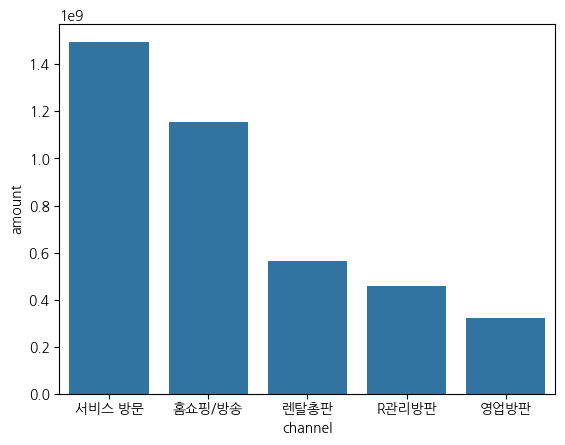

In [58]:
sns.barplot(data=channel_amount_sum_sort_top5_df,x='channel',y='amount')
plt.show()


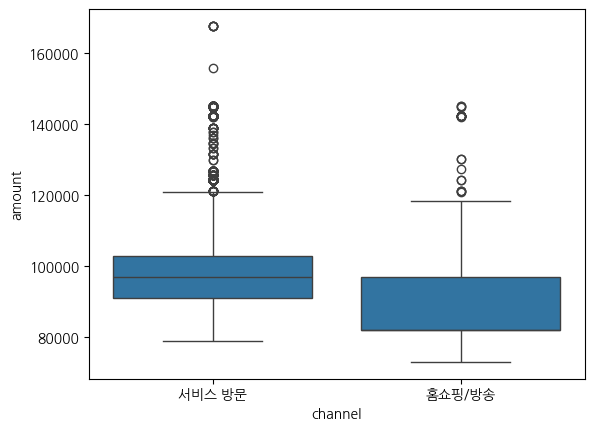

In [61]:
sns.boxplot(data=data_df,x='channel',y='amount', order=['서비스 방문', '홈쇼핑/방송'])
plt.show()

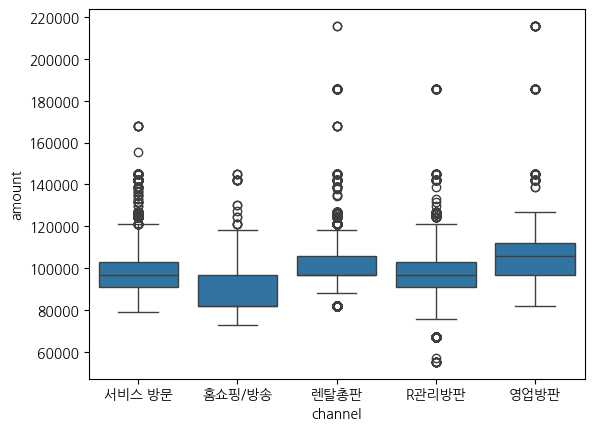

In [62]:
sns.boxplot(data=data_df,x='channel',y='amount', order=channel_amount_sum_sort_top5_df['channel'])
plt.show()

### X:연속형, Y:연속형
- 산점도(scatterplot), 회귀그래프(lmplot), 히트맵(pairplot), 확률밀도(kdeplot)

#### 산점도 

<Axes: xlabel='Mileage', ylabel='age'>

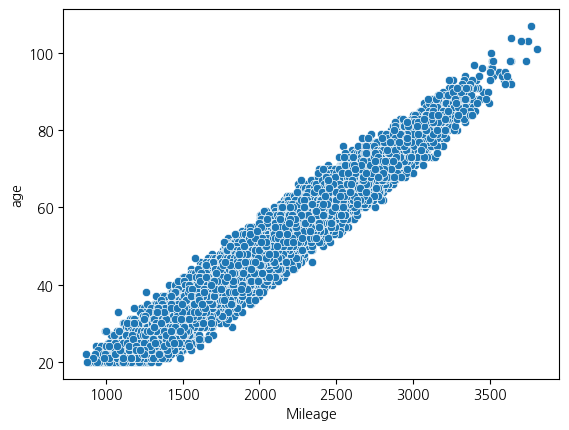

In [63]:
sns.scatterplot(data=data_df, x='Mileage',y='age')
plt.show()

In [64]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

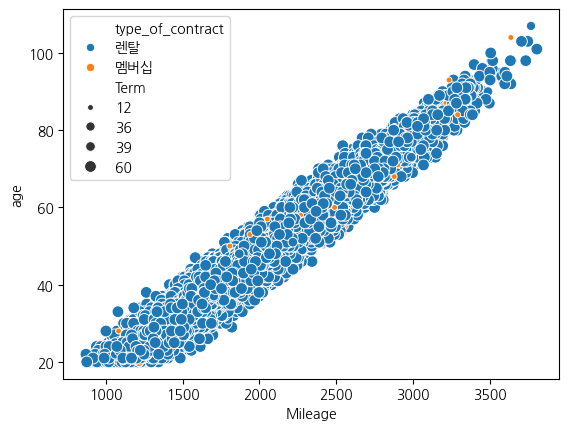

In [66]:
sns.scatterplot(data=data_df, x='Mileage',y='age', hue='type_of_contract', size='Term')
plt.show()

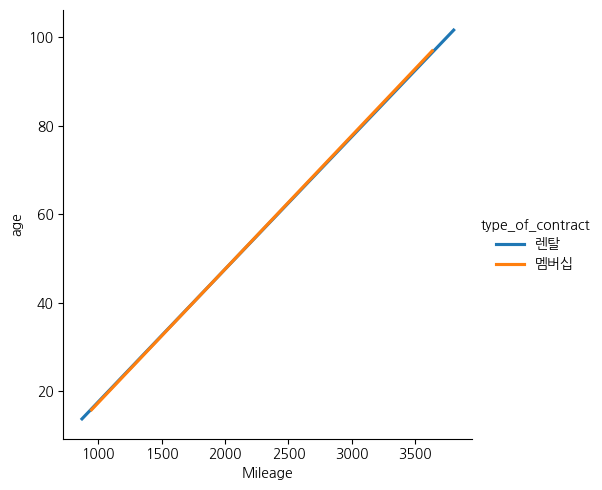

In [68]:
# sns.lmplot(data=data_df, x='Mileage',y='age', hue='type_of_contract')
sns.lmplot(data=data_df, x='Mileage',y='age', hue='type_of_contract', scatter=False)
plt.show()


In [69]:
data_df[['Term', 'amount', 'age', 'Mileage']].corr()

,Term,amount,age,Mileage
Term,1.000000,0.465662,-0.008474,-0.007871
amount,0.465662,1.000000,-0.003537,-0.004146
age,-0.008474,-0.003537,1.000000,0.973281
Mileage,-0.007871,-0.004146,0.973281,1.000000


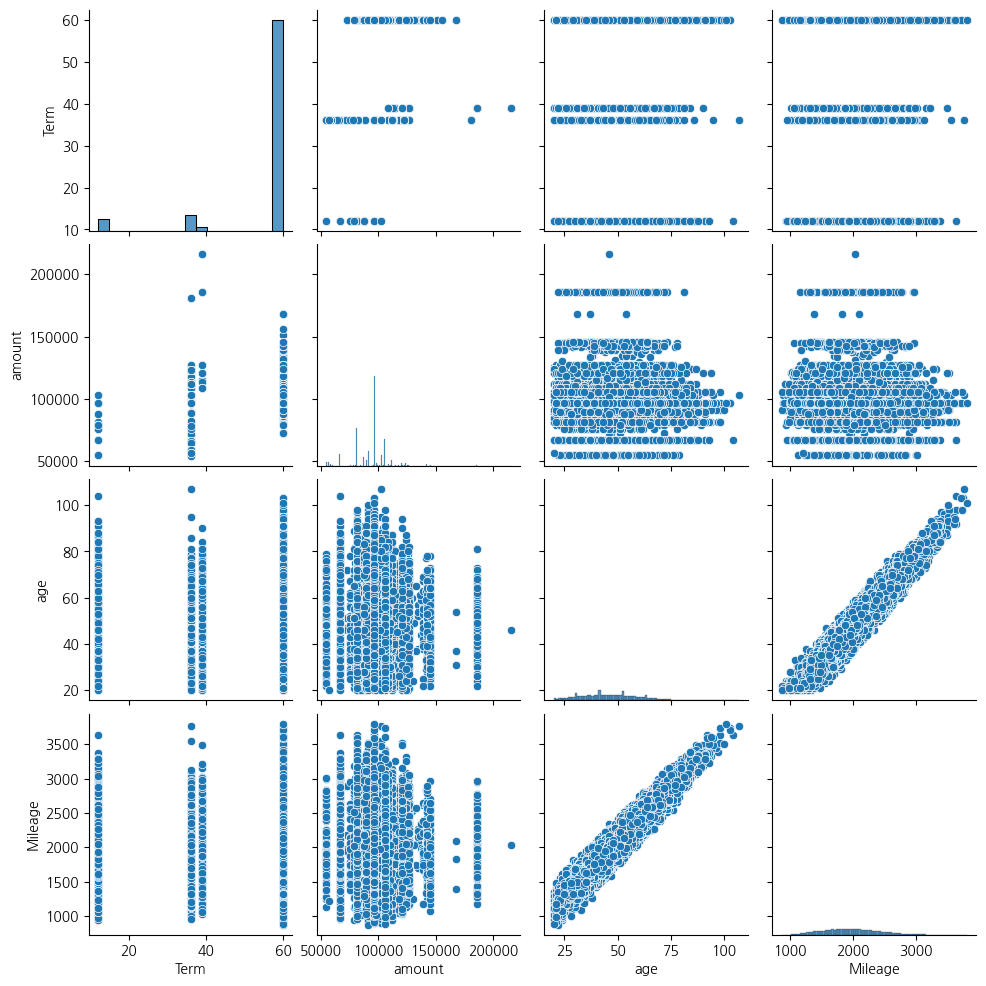

In [71]:
sns.pairplot(data=data_df[['Term', 'amount', 'age', 'Mileage']]) # 수치로 보는게 더 나을 듯

### X: 순서형(시계열)/ Y: 연속형
- lineplot

In [72]:
data_df['datetime'] = pd.to_datetime(data_df['datetime'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 51304 non-null  int64         
 1   type_of_contract   51300 non-null  object        
 2   type_of_contract2  51303 non-null  object        
 3   channel            51304 non-null  object        
 4   datetime           51304 non-null  datetime64[ns]
 5   Term               51304 non-null  int64         
 6   payment_type       51304 non-null  object        
 7   product            51303 non-null  object        
 8   amount             51304 non-null  int64         
 9   state              51304 non-null  object        
 10  overdue_count      51304 non-null  int64         
 11  overdue            51302 non-null  object        
 12  credit rating      42521 non-null  float64       
 13  bank               48544 non-null  object        
 14  cancel

<Axes: xlabel='datetime', ylabel='amount'>

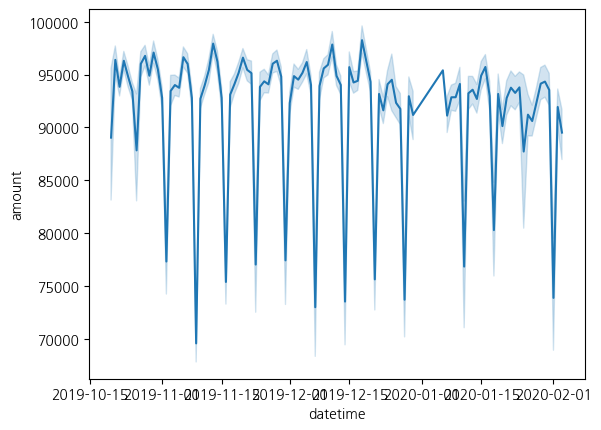

In [73]:
sns.lineplot(data=data_df, x='datetime', y='amount') # row 갯수 

<Axes: xlabel='datetime', ylabel='amount'>

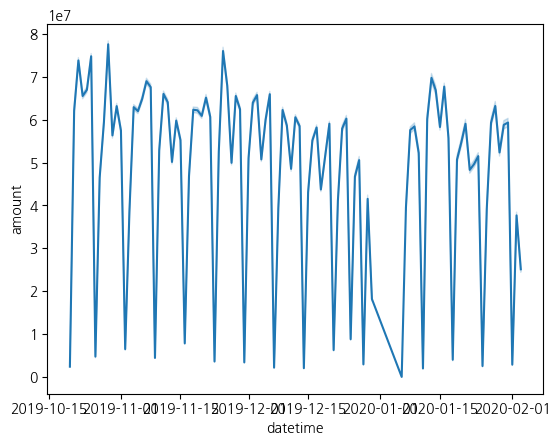

In [74]:
sns.lineplot(data=data_df, x='datetime', y='amount', estimator='sum')
